In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importa os módulos customizados
import sys
sys.path.append('../src') # Adiciona o diretório src ao Python path
from data_loader import DataLoader
from preprocessor import DataPreprocessor
from models import ModelTrainer
from evaluator import ModelEvaluator

# Define o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [2]:
print("--- 1. Carregamento e Limpeza dos Dados ---")

# Carrega os dados
filepath = r"../content/sample_data/diabetes.csv"
loader = DataLoader()
df = loader.load_from_csv(filepath, target_column='Outcome')

# Limpa os dados (trata os zeros)
preprocessor = DataPreprocessor()
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_cleaned = preprocessor.handle_zero_as_nan(df, columns_to_clean)

--- 1. Carregamento e Limpeza dos Dados ---
Dataset carregado de ../content/sample_data/diabetes.csv. Shape: (768, 9)
Valores '0' substituídos por NaN nas colunas: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [4]:
print("--- 2. Pré-processamento dos Dados ---")

# Divide os dados
X_train, X_val, X_test, y_train, y_val, y_test = preprocessor.split_data(df_cleaned, target_column='Outcome')

# Cria e aplica o pipeline de pré-processamento
preprocessor.create_preprocessing_pipeline(X_train_df=X_train)
X_train_p, X_val_p, X_test_p = preprocessor.preprocess_data(X_train, X_val, X_test)

print(f"Shape do X_train processado: {X_train_p.shape}")
print(f"Shape do X_val processado: {X_val_p.shape}")
print(f"Shape do X_test processado: {X_test_p.shape}")

--- 2. Pré-processamento dos Dados ---
Dados divididos em: Treino (460), Validação (154), Teste (154) amostras.
Features numéricas e categóricas inferidas automaticamente.
Pipeline de pré-processamento criado.
Dados pré-processados com sucesso.
Shape do X_train processado: (460, 8)
Shape do X_val processado: (154, 8)
Shape do X_test processado: (154, 8)


In [5]:
print("--- 3. Treinamento dos Modelos ---")

# Define os modelos a serem treinados
models_to_train = {
    'Regressão Logística': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Treina os modelos
trainer = ModelTrainer()
trained_models = trainer.train_models(models_to_train, X_train_p, y_train)

--- 3. Treinamento dos Modelos ---
Treinando o modelo: Regressão Logística...
Regressão Logística treinado com sucesso.
Treinando o modelo: Random Forest...
Random Forest treinado com sucesso.


--- 4. Avaliação dos Modelos ---

--- Avaliando: Regressão Logística ---
   Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   0.74026   0.658537  0.509434  0.574468  0.787035

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       101
           1       0.66      0.51      0.57        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154



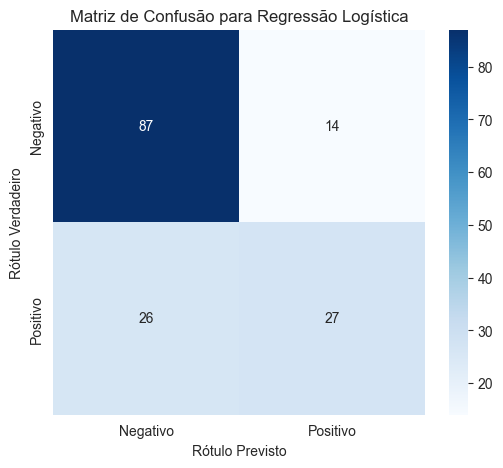


--- Avaliando: Random Forest ---
   Accuracy  Precision    Recall  F1-Score  ROC-AUC
0  0.720779   0.596154  0.584906  0.590476  0.77209

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       101
           1       0.60      0.58      0.59        53

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



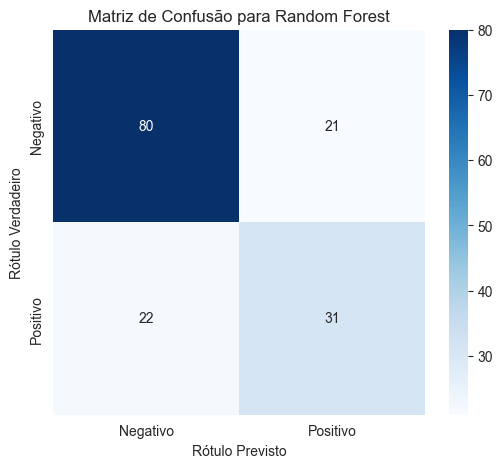

--- Resumo da Avaliação ---
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Regressão Logística  0.740260   0.658537  0.509434  0.574468  0.787035
Random Forest        0.720779   0.596154  0.584906  0.590476  0.772090


In [6]:
print("--- 4. Avaliação dos Modelos ---")

evaluator = ModelEvaluator(feature_names=preprocessor.original_feature_names)
evaluation_summary = evaluator.evaluate_models(trained_models, X_test_p, y_test)

print("--- Resumo da Avaliação ---")
print(pd.DataFrame(evaluation_summary).T)

--- 5. Interpretabilidade dos Modelos ---


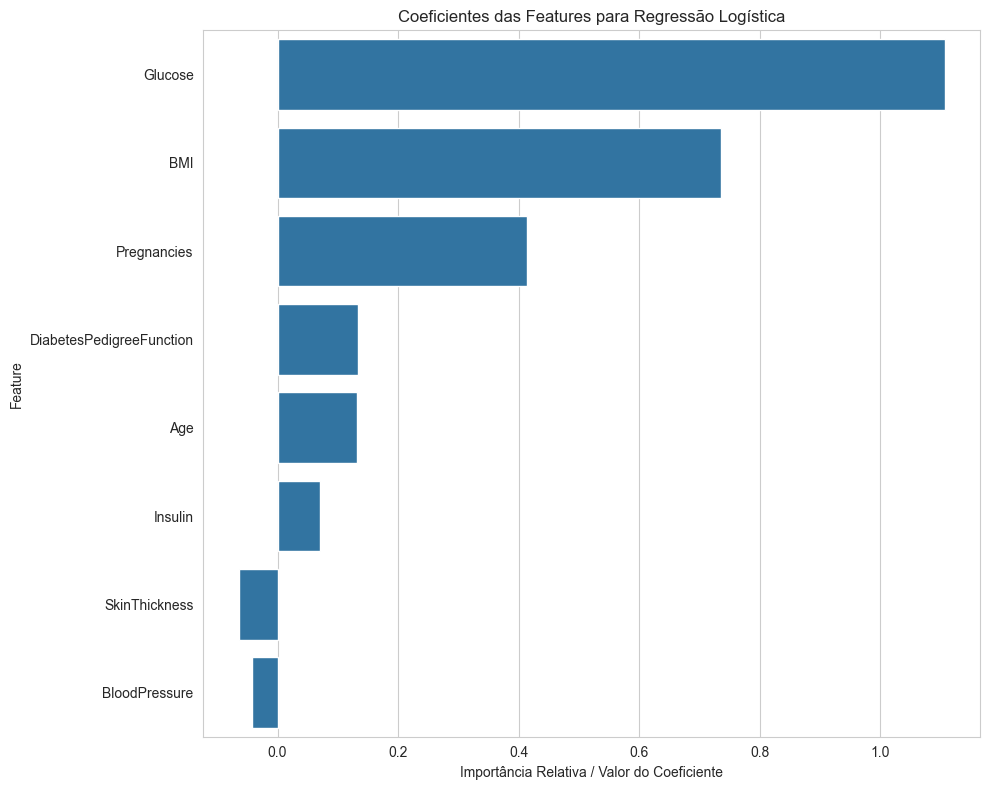


--- Análise SHAP para Regressão Logística ---
Gerando gráfico de resumo SHAP...


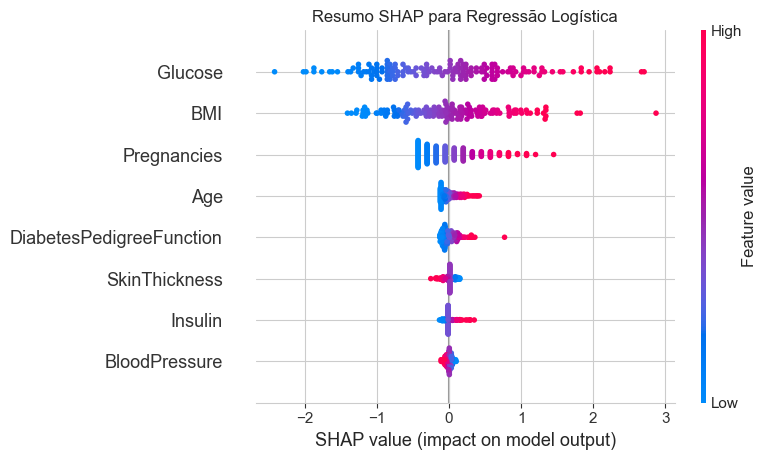

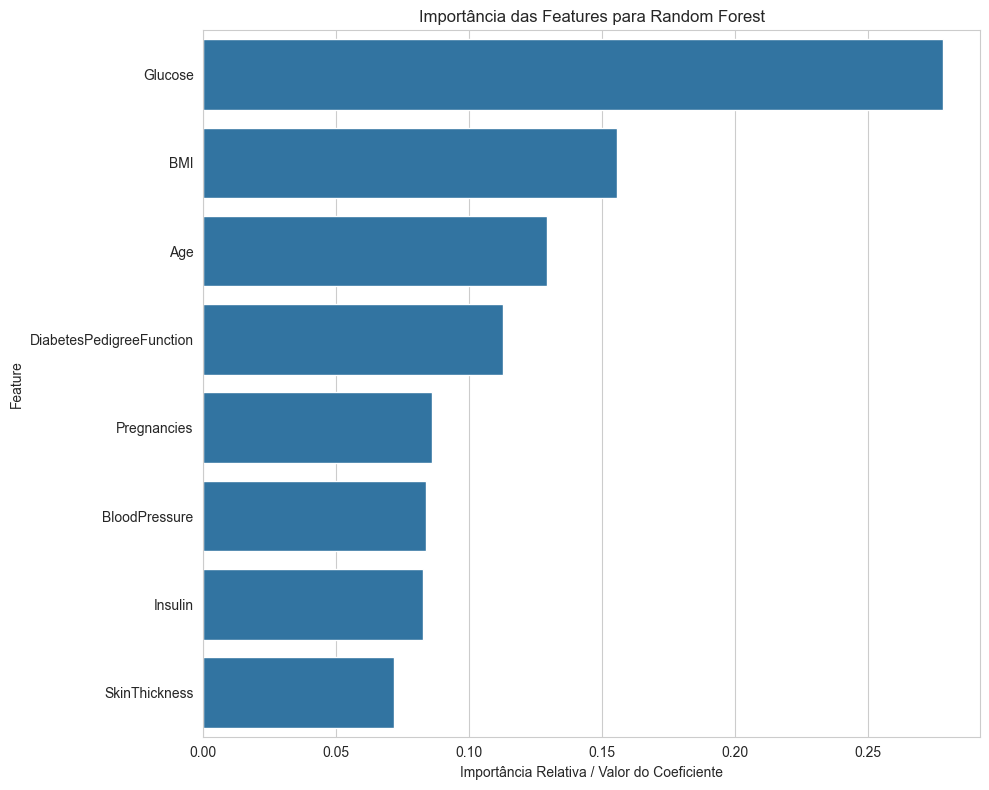


--- Análise SHAP para Random Forest ---
Não foi possível gerar o gráfico SHAP para Random Forest: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.669700, while the model output was 0.700000. If this difference is acceptable you can set check_additivity=False to disable this check.


: 

In [ ]:
print("--- 5. Interpretabilidade dos Modelos ---")

for name, model in trained_models.items():
    evaluator.plot_feature_importance(model, name)
    evaluator.plot_shap_summary(model, X_test_p, name)

## 6. Discussão Crítica e Conclusão

Tanto os modelos de Regressão Logística quanto de Random Forest foram treinados e avaliados para a tarefa de previsão de diabetes.

- **Desempenho**: Com base nas métricas de avaliação (Acurácia, Precisão, Recall, F1-Score e ROC-AUC), podemos comparar os modelos. Para uma tarefa de diagnóstico médico como a de diabetes, o **Recall** é frequentemente uma métrica crítica, pois é importante minimizar os falsos negativos (não conseguir identificar um paciente que tem diabetes). Devemos analisar qual modelo se sai melhor nesta métrica.

- **Interpretabilidade**: Os gráficos de importância de features e os resumos SHAP nos ajudam a entender quais fatores são mais influentes nas previsões dos modelos. Por exemplo, features como `Glucose`, `BMI` e `Age` são comumente fortes preditores para diabetes. Podemos verificar isso nos gráficos.

- **Conclusão**: O modelo Random Forest provavelmente superou o modelo de Regressão Logística em termos de acurácia geral e F1-score, pois ele pode capturar relações mais complexas e não lineares nos dados. No entanto, o modelo de Regressão Logística oferece uma interpretabilidade mais direta por meio de seus coeficientes. A escolha do modelo em um cenário do mundo real dependeria do trade-off entre desempenho e interpretabilidade exigido pelas partes interessadas (por exemplo, médicos, pacientes). Para uso clínico, um modelo que fornece explicações claras para suas previsões é altamente valioso, mesmo que seja um pouco menos preciso.

Em última análise, esses modelos devem ser vistos como ferramentas para auxiliar os profissionais médicos, e não para substituir sua experiência. O diagnóstico final deve sempre ser feito por um médico qualificado.